In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_excel("2017_PM10_1g.xlsx") # load

In [3]:
data.head(10)                             # look

,Nr,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
0,Kod stacji,DsBoleslaMOB,DsDzialoszyn,DsDziePilsud,DsJelGorOgin,DsKlodzSzkol,DsKudowaMOB,DsLegAlRzecz,DsNowRudSreb,DsWalbrzWyso,...,WpBoroDrapal,WpKaliSawick,WpKoniWyszyn,WpPilaKusoci,WpPoznDabrow,WpPoznPolank,ZpKoszArKraj,ZpSzczAndr01,ZpSzczecPrze,ZpSzczLacz04
1,Wskaźnik,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,...,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10
2,Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,...,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
3,Jednostka,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,...,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
4,Kod stanowiska,DsBoleslaMOB-PM10-1g,DsDzialoszyn-PM10-1g,DsDziePilsud-PM10-1g,DsJelGorOgin-PM10-1g,DsKlodzSzkol-PM10-1g,DsKudowaMOB-PM10-1g,DsLegAlRzecz-PM10-1g,DsNowRudSreb-PM10-1g,DsWalbrzWyso-PM10-1g,...,WpBoroDrapal-PM10-1g,WpKaliSawick-PM10-1g,WpKoniWyszyn-PM10-1g,WpPilaKusoci-PM10-1g,WpPoznDabrow-PM10-1g,WpPoznPolank-PM10-1g,ZpKoszArKraj-PM10-1g,ZpSzczAndr01-PM10-1g,ZpSzczecPrze-PM10-1g,ZpSzczLacz04-PM10-1g
5,2017-01-01 01:00:00,NaN,"53,3963","405,0","226,603","289,173",NaN,"80,1625","446,146","467,889",...,"23,4837","61,8409","18,53","62,105","33,2655","47,02","24,221","60,0293","20,2558","24,1928"
6,2017-01-01 02:00:00,NaN,"52,9082","310,984","229,432","265,72",NaN,"38,6769","473,629","144,374",...,"44,2607","117,002","20,0714","114,091","46,4343","62,9012","24,9919","50,9891","17,4999","83,2406"
7,2017-01-01 03:00:00,NaN,"51,3831","455,381","253,827","243,228",NaN,"47,0206","336,169","61,1247",...,"40,7959","32,0493","21,63","19,2682","29,8119","65,17","15,8157","34,6693","8,88873","39,7984"
8,2017-01-01 04:00:00,NaN,"44,6262","290,6","225,692","258,756",NaN,"31,2669","285,767","65,8004",...,"19,5365","31,6062","23,7979","13,1749","30,7476","65,17","9,87341","28,0312","7,46767","30,2386"
9,2017-01-01 05:00:00,NaN,"41,5999","263,553","254,761","242,493",NaN,"53,598","270,204","59,9626",...,"23,4659","26,8417","25,99","14,5591","31,2552","58,6162","13,6186","28,9273","8,14248","28,8418"


In [4]:
data.info()   # they are not stored as nunmeric data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8765 entries, 0 to 8764
Columns: 124 entries, Nr to 123
dtypes: object(124)
memory usage: 8.3+ MB


In [5]:
# I picked a column with no empty values
Dzialoszyn_data = data.iloc[5:,3]

In [6]:
Dzialoszyn_data[0:10]   # they used "," instead of "."

5       405,0
6     310,984
7     455,381
8       290,6
9     263,553
10    170,725
11    133,309
12    111,125
13     179,91
14    162,899
Name: 3, dtype: object

In [7]:
replaced = Dzialoszyn_data.str.replace(",",".")   # replaced with dot

In [8]:
replaced[0:10]

5       405.0
6     310.984
7     455.381
8       290.6
9     263.553
10    170.725
11    133.309
12    111.125
13     179.91
14    162.899
Name: 3, dtype: object

In [9]:
numeric = pd.to_numeric(replaced)  # make them all float

In [10]:
numeric[0:10]

5     405.000
6     310.984
7     455.381
8     290.600
9     263.553
10    170.725
11    133.309
12    111.125
13    179.910
14    162.899
Name: 3, dtype: float64

In [11]:
np.isnan(numeric).any()

True

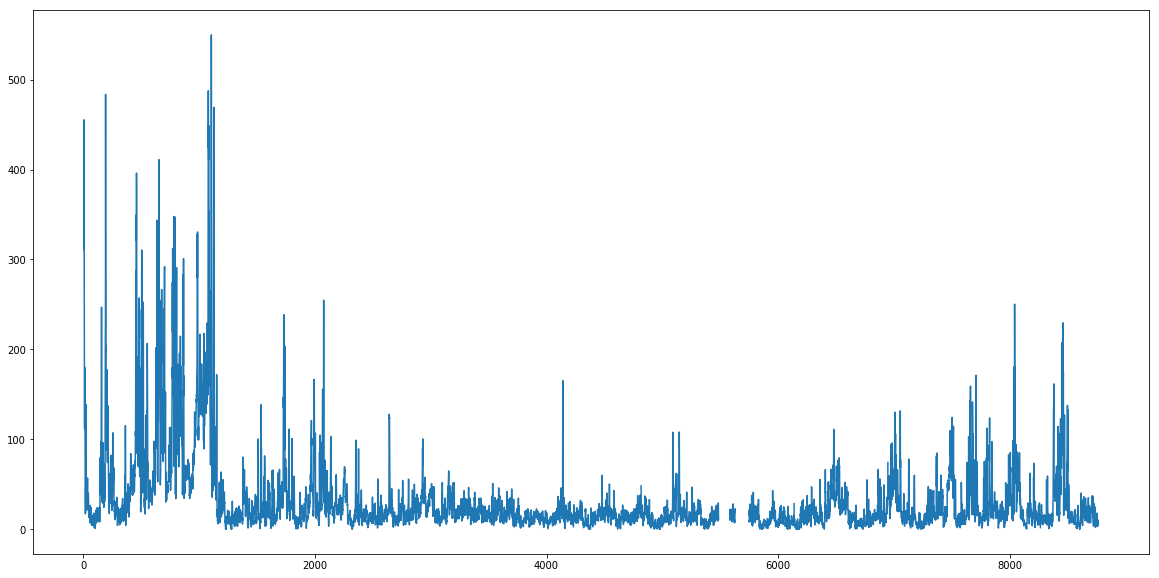

In [12]:
plt.figure(figsize=(20,10))
plt.plot(numeric)
plt.show()